In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV,ParameterGrid,train_test_split,validation_curve,learning_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

In [2]:
fw = pd.read_csv('data_source/log2.csv')

x = fw.loc[:,['Destination Port', 'NAT Source Port','Packets', 'Elapsed Time (sec)','Bytes Received']]
y = fw.loc[:,'Action']

y.replace({'allow':0, 'deny':1, 'drop':2, 'reset-both':3},inplace=True)
# split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,stratify=fw['Action'])


In [3]:
pipe = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('classifier', XGBClassifier()) # object='multi:softmax',num_class=4,seed=42,eval_metric='merror'
])

In [4]:
max_dept = list(np.arange(1,11))
parameters = [{'classifier__object':['multi:softmax'],'classifier__num_class':[4],'classifier__eval_metric':['merror','logloss'],'classifier__learning_rate':[0.1],'classifier__max_depth':max_dept},
              {'classifier__object':['multi:softprob'],'classifier__num_class':[4],'classifier__eval_metric':['merror','logloss','auc','aucpr'],'classifier__learning_rate':[0.1],'classifier__learning_rate':max_dept}

]

In [150]:
grid = GridSearchCV(pipe,parameters,cv=5)
grid.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

[18:28:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[18:28:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[18:28:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[18:28:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[18:28:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[18:28:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpytho

In [9]:
pipe.set_params(classifier__eval_metric = 'merror', classifier__learning_rate = 1, classifier__num_class= 4, classifier__object= 'multi:softprob')
# classifier__eval_metric = 'merror', classifier__learning_rate = 1, classifier__num_class= 4, classifier__object= 'multi:softprob'

Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='merror',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_class=4, num_parallel_tree=None,
                               object='multi:softprob', ...))])

In [10]:
train_sizes, train_scores, test_scores = learning_curve(pipe, x_train, y_train, cv=5,scoring='f1_macro')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

[11:04:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "object" } are not used.

[11:04:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "object" } are not used.

[11:04:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "object" } are not used.

[11:04:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "object" } are not used.

[11:04:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "object" } are not used.

[11:04:53] WARNING: 

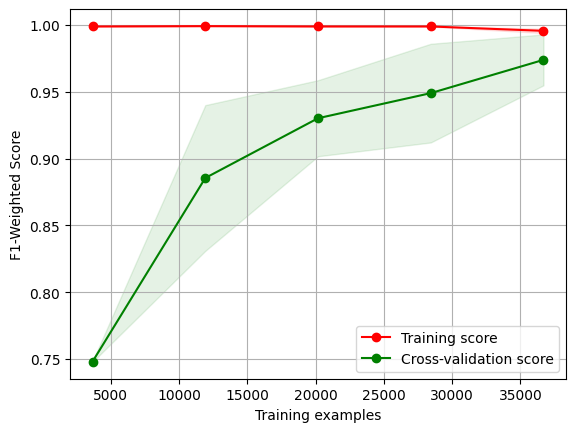

In [11]:
plt.figure()
plt.xlabel("Training examples")
plt.ylabel("F1-Weighted Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

plt.legend(loc="best")

In [ ]:
pipe.fit(x_train, y_train)

print('Training set score: ' + str(pipe.score(x_train,y_train)))
print('Test set score: ' + str(pipe.score(x_test,y_test)))

[17:09:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

Training set score: 0.9989972096267876
Test set score: 0.9988809766022381


In [ ]:
pipe.fit(x_train, y_train)

train_yhat = pipe.predict(x_train)
train_pipe = pipe.score(x_train,y_train)

test_yhat = pipe.predict(x_test)
test_pipe = pipe.score(x_test,y_test)
print('Train Score\n',classification_report(y_train,train_yhat))
print('Test Score\n',classification_report(y_test, test_yhat))
print(f"AVG F1-Score Train: {train_pipe}\nAVG F1-Score Test: {test_pipe}")

[17:09:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

Train Score
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26348
           1       1.00      1.00      1.00     10491
           2       1.00      1.00      1.00      8995
           3       1.00      0.95      0.97        38

    accuracy                           1.00     45872
   macro avg       1.00      0.99      0.99     45872
weighted avg       1.00      1.00      1.00     45872

Test Score
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11292
           1       1.00      1.00      1.00      4496
           2       1.00      1.00      1.00      3856
           3       1.00      0.75      0.86        16

    accuracy                           1.00     19660
   macro avg       1.00      0.94  